In [19]:
import numpy as np 
import scipy.io as sio 
from matplotlib import pyplot as plt
from sklearn.manifold import Isomap
from sklearn.datasets import load_digits
from scipy.stats import zscore
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

## First let's just play around with ISOMAP on the MNIST dataset

<IPython.core.display.Javascript object>


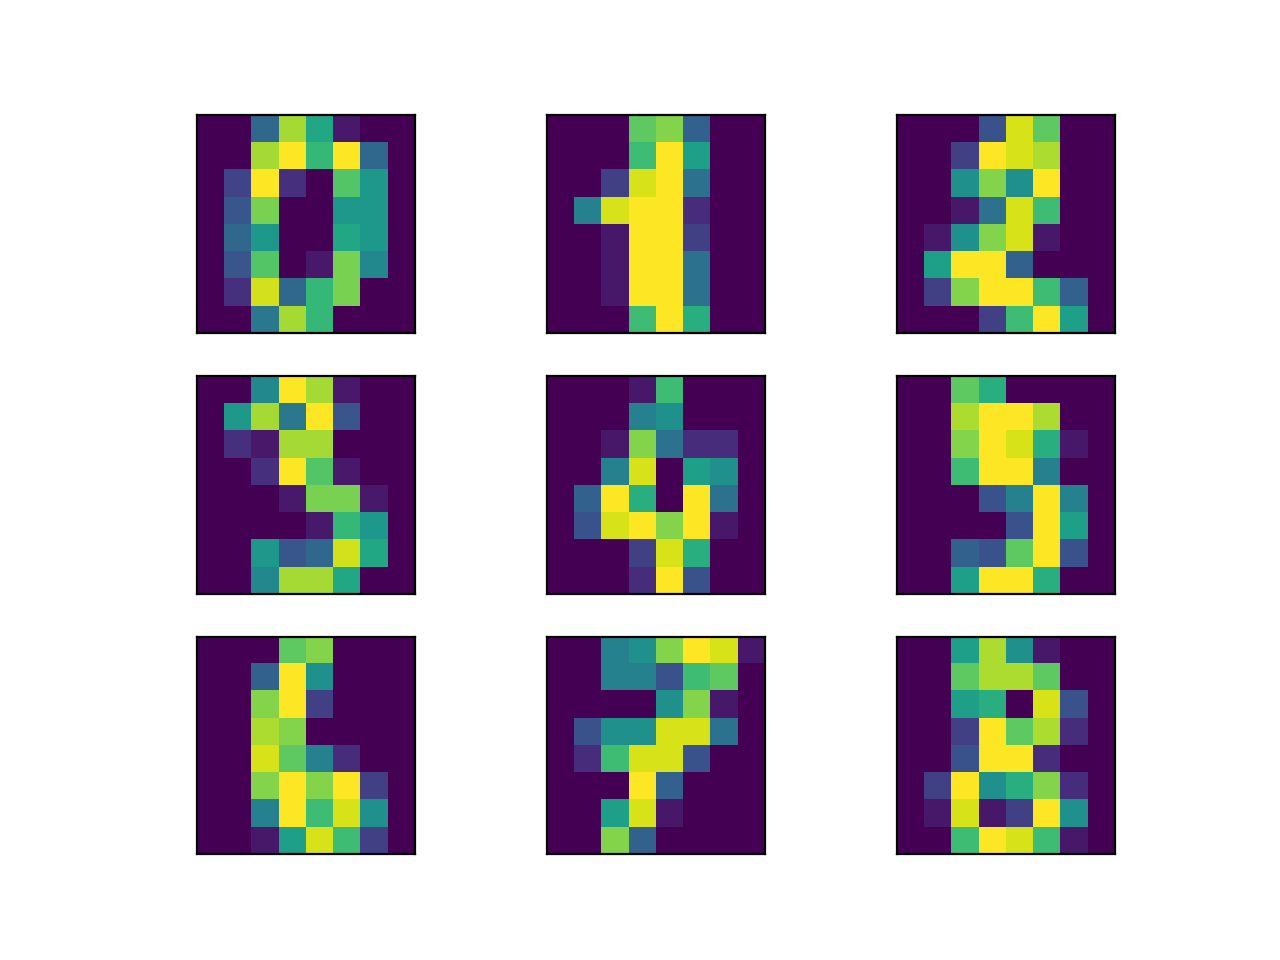

In [21]:
# load MNIST dataset
X, y = load_digits(return_X_y=True)
X.shape

fig, axes = plt.subplots(3,3, sharey='row', sharex='col')

# display MNIST data
for col in range(3):
    for row in range(3):
        axes[col,row].matshow(X[col*3+row,:].reshape(8,8)) 
        axes[col,row].set_xticks([])
        axes[col,row].set_yticks([])
        

In [22]:
# Perform ISOMAP on MNIST
embedding = Isomap(n_components=3)
X_transformed = embedding.fit_transform(X)
print(X_transformed.shape)

(1797, 3)


<IPython.core.display.Javascript object>


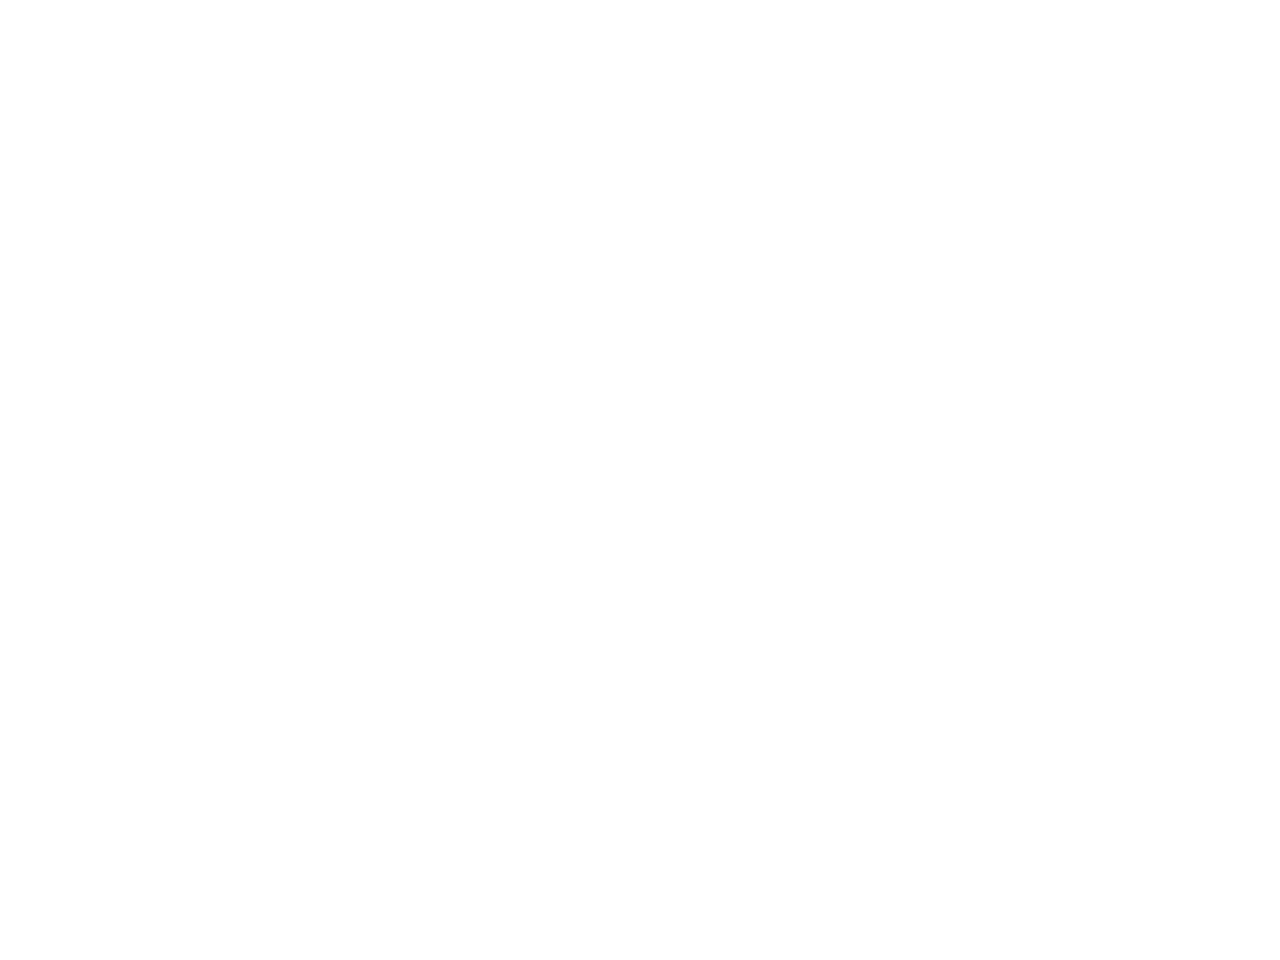

Text(0.5, 0.92, 'ISOMAP on MNIST Data')

In [23]:
# visualize ISOMAP projection
colors = np.array(sns.color_palette())
fig =plt.figure()
ax = fig.add_subplot(111, projection='3d')
for n in np.unique(y): 
    digit_ix = np.where(y == n)[0]
    ax.scatter(X_transformed[digit_ix,0],X_transformed[digit_ix,1],X_transformed[digit_ix,2],s = 2.5,c = colors[n,:].reshape(1,-1),label = n)  
plt.legend();
plt.title("ISOMAP on MNIST Data") 


## Now let's do some neural data

In [24]:
data = sio.loadmat('/Users/joshstern/Documents/UchidaLab_matlab/neuroPixelsData/80/m80FR_decVar.mat')
FR_decVar = data['FR_decVar'][0]
tbin_ms = .02

In [25]:
# ok, let's grab some neural data
sIdx = 2 # 3/17
fr_mat = FR_decVar[sIdx]['fr_mat'][0]
fr_mat_full = np.concatenate(fr_mat,1)
fr_mat_full.shape

(305, 26668)

<IPython.core.display.Javascript object>


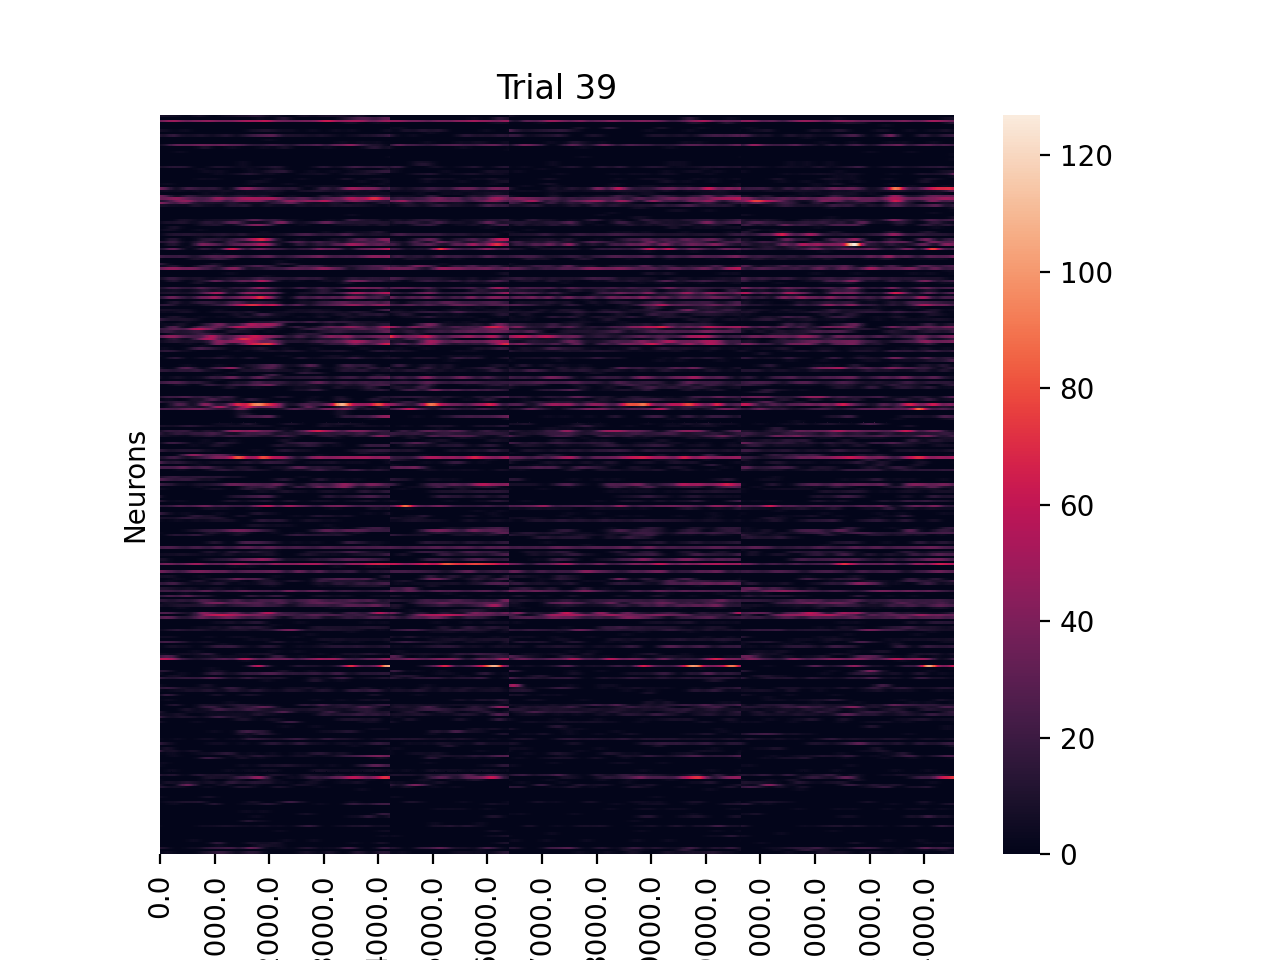

In [27]:
# get some trial information and visualize a single trial
nTrials = fr_mat.shape[0]
t_lens = [fr_mat_iTrial.shape[1] for fr_mat_iTrial in fr_mat.tolist()]
patchstop_ix = np.cumsum(t_lens)
patchleave_ix = patchstop_ix + t_lens 
trial = 38 
plt.figure()
plt.title("Trial %i"%(trial+1))
sns.heatmap(fr_mat_full[:,patchstop_ix[trial]:patchleave_ix[trial]])
plt.xlabel("Time")
plt.ylabel("Neurons")
sec_ix = np.array(range(0,t_lens[trial],round((1/tbin_ms))))
plt.xticks(sec_ix,sec_ix * 1000 * tbin_ms);
plt.yticks([]);

In [84]:
# perform isomap on neural data
# play around with n_neighbors, distance metric, to optimize reconstruction_error()
neighbor_range = list(range(20,100,10)) 
components_range = list(range(1,10))
data_pts = 5000
performance = np.zeros((len(neighbor_range),len(components_range)))
for i,neighbors in enumerate(neighbor_range):
    for j,components in enumerate(components_range):
        embedding = Isomap(n_components=components,n_neighbors=neighbors,metric = 'cosine') # play around w/ n_neighbors, metric
        fr_mat_embedded = embedding.fit_transform(fr_mat_full.T[:data_pts,:]) 
        performance[i,j] = embedding.reconstruction_error()


<IPython.core.display.Javascript object>


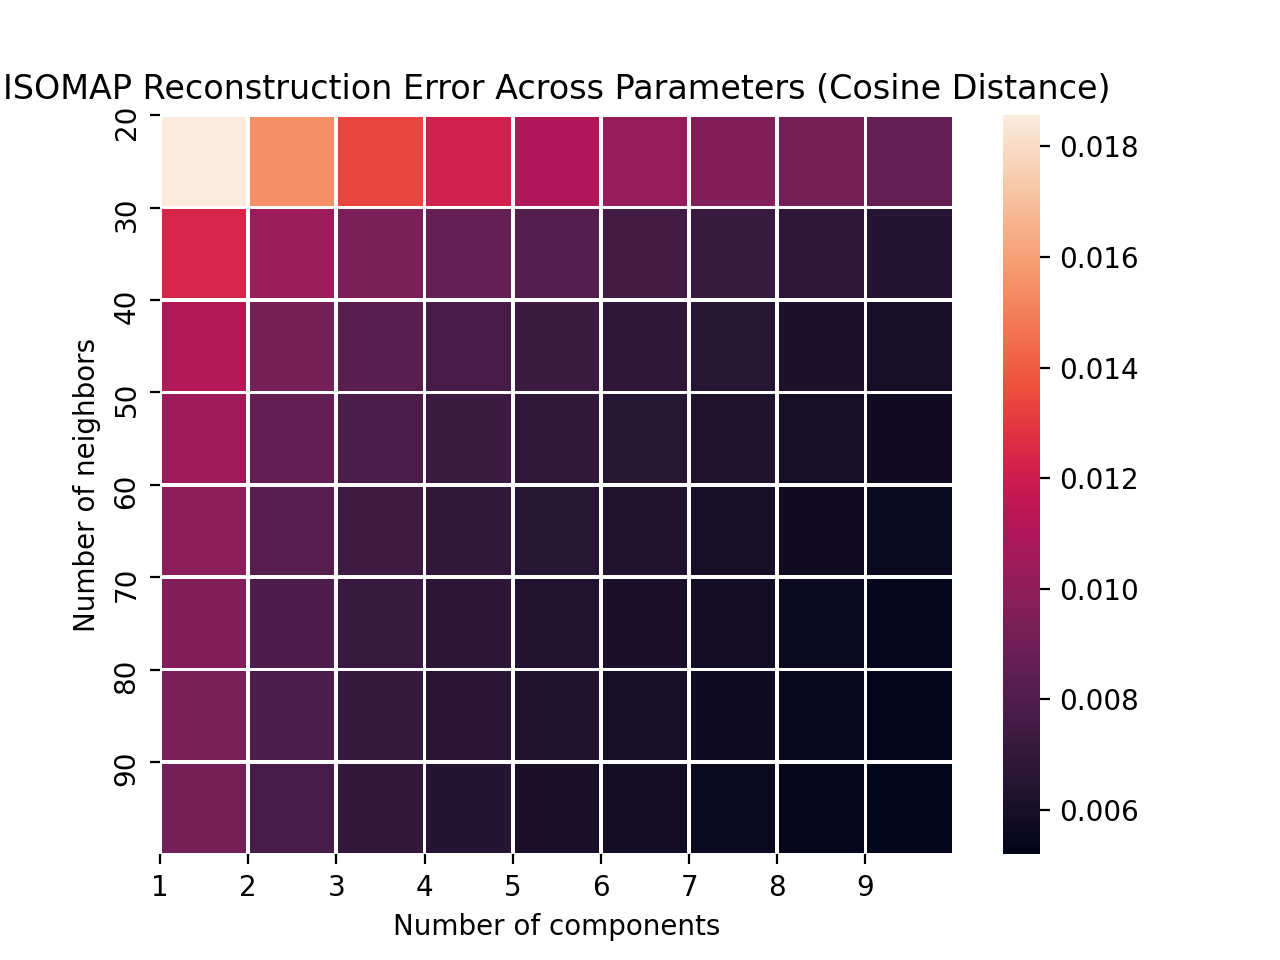

In [86]:
# visualize performance assay 
plt.figure()
sns.heatmap(performance,linewidths=1)
plt.xticks(list(range(len(components_range))),components_range);
plt.yticks(list(range(len(neighbor_range))),neighbor_range); 
plt.xlabel("Number of components")
plt.ylabel("Number of neighbors") 
plt.title("ISOMAP Reconstruction Error Across Parameters (Cosine Distance)");
# plt.yticks([]);

<IPython.core.display.Javascript object>


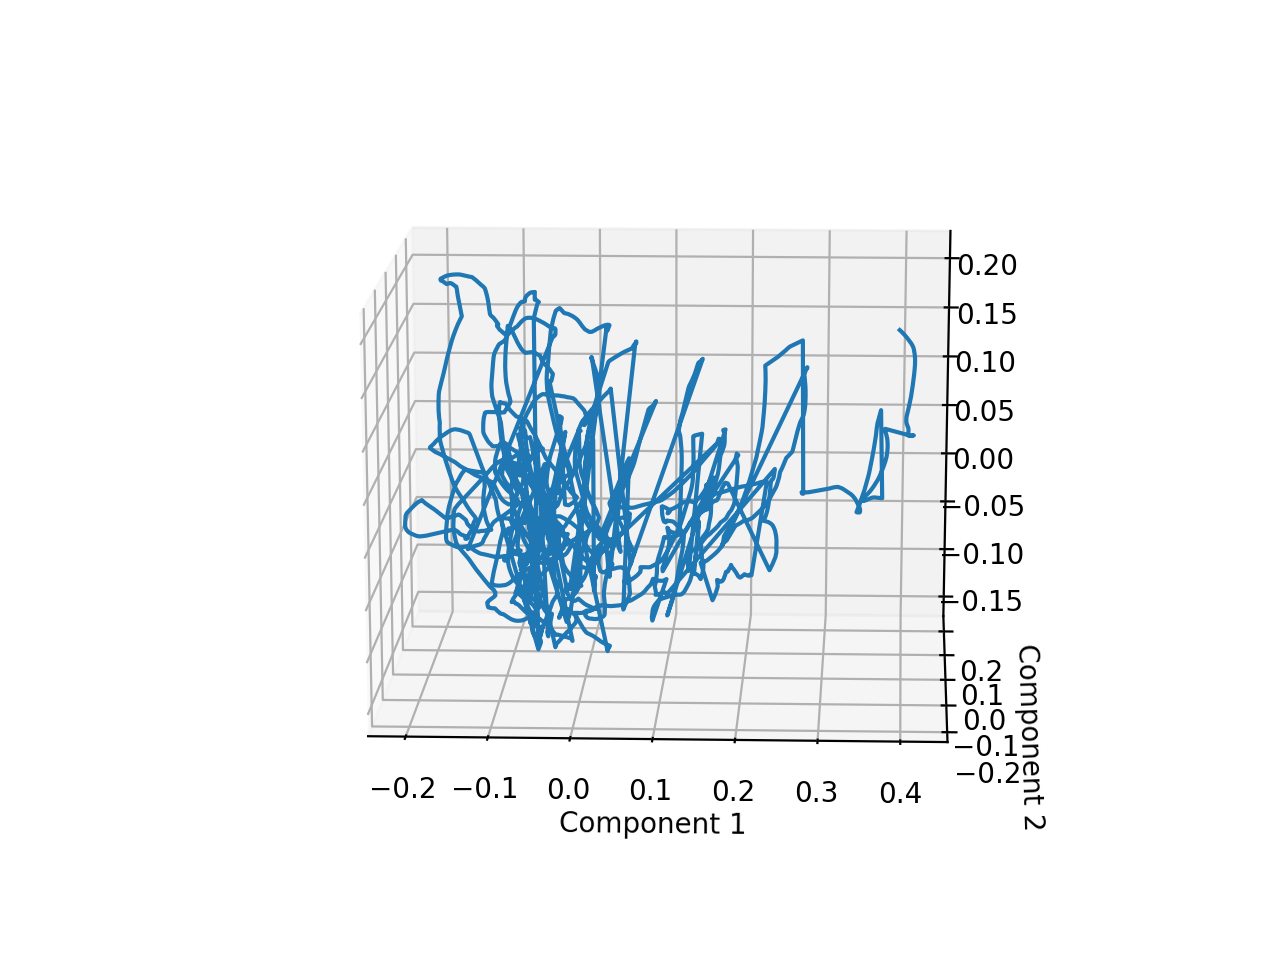

Text(0.5, 0, 'Component 2')

In [54]:
# visualize manifold embedding
trial = 17
ix = np.array(range(patchstop_ix[trial],patchleave_ix[trial]))
fig =plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.plot(fr_mat_embedded[ix,0],fr_mat_embedded[ix,1],fr_mat_embedded[ix,2])

ax.plot(fr_mat_embedded[:,0],fr_mat_embedded[:,1],fr_mat_embedded[:,2]) 
plt.xlabel("Component 1")
plt.ylabel("Component 2")


In [58]:
list(range(0,10,2))

[0, 2, 4, 6, 8]